#VIDEO ANALYSIS


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


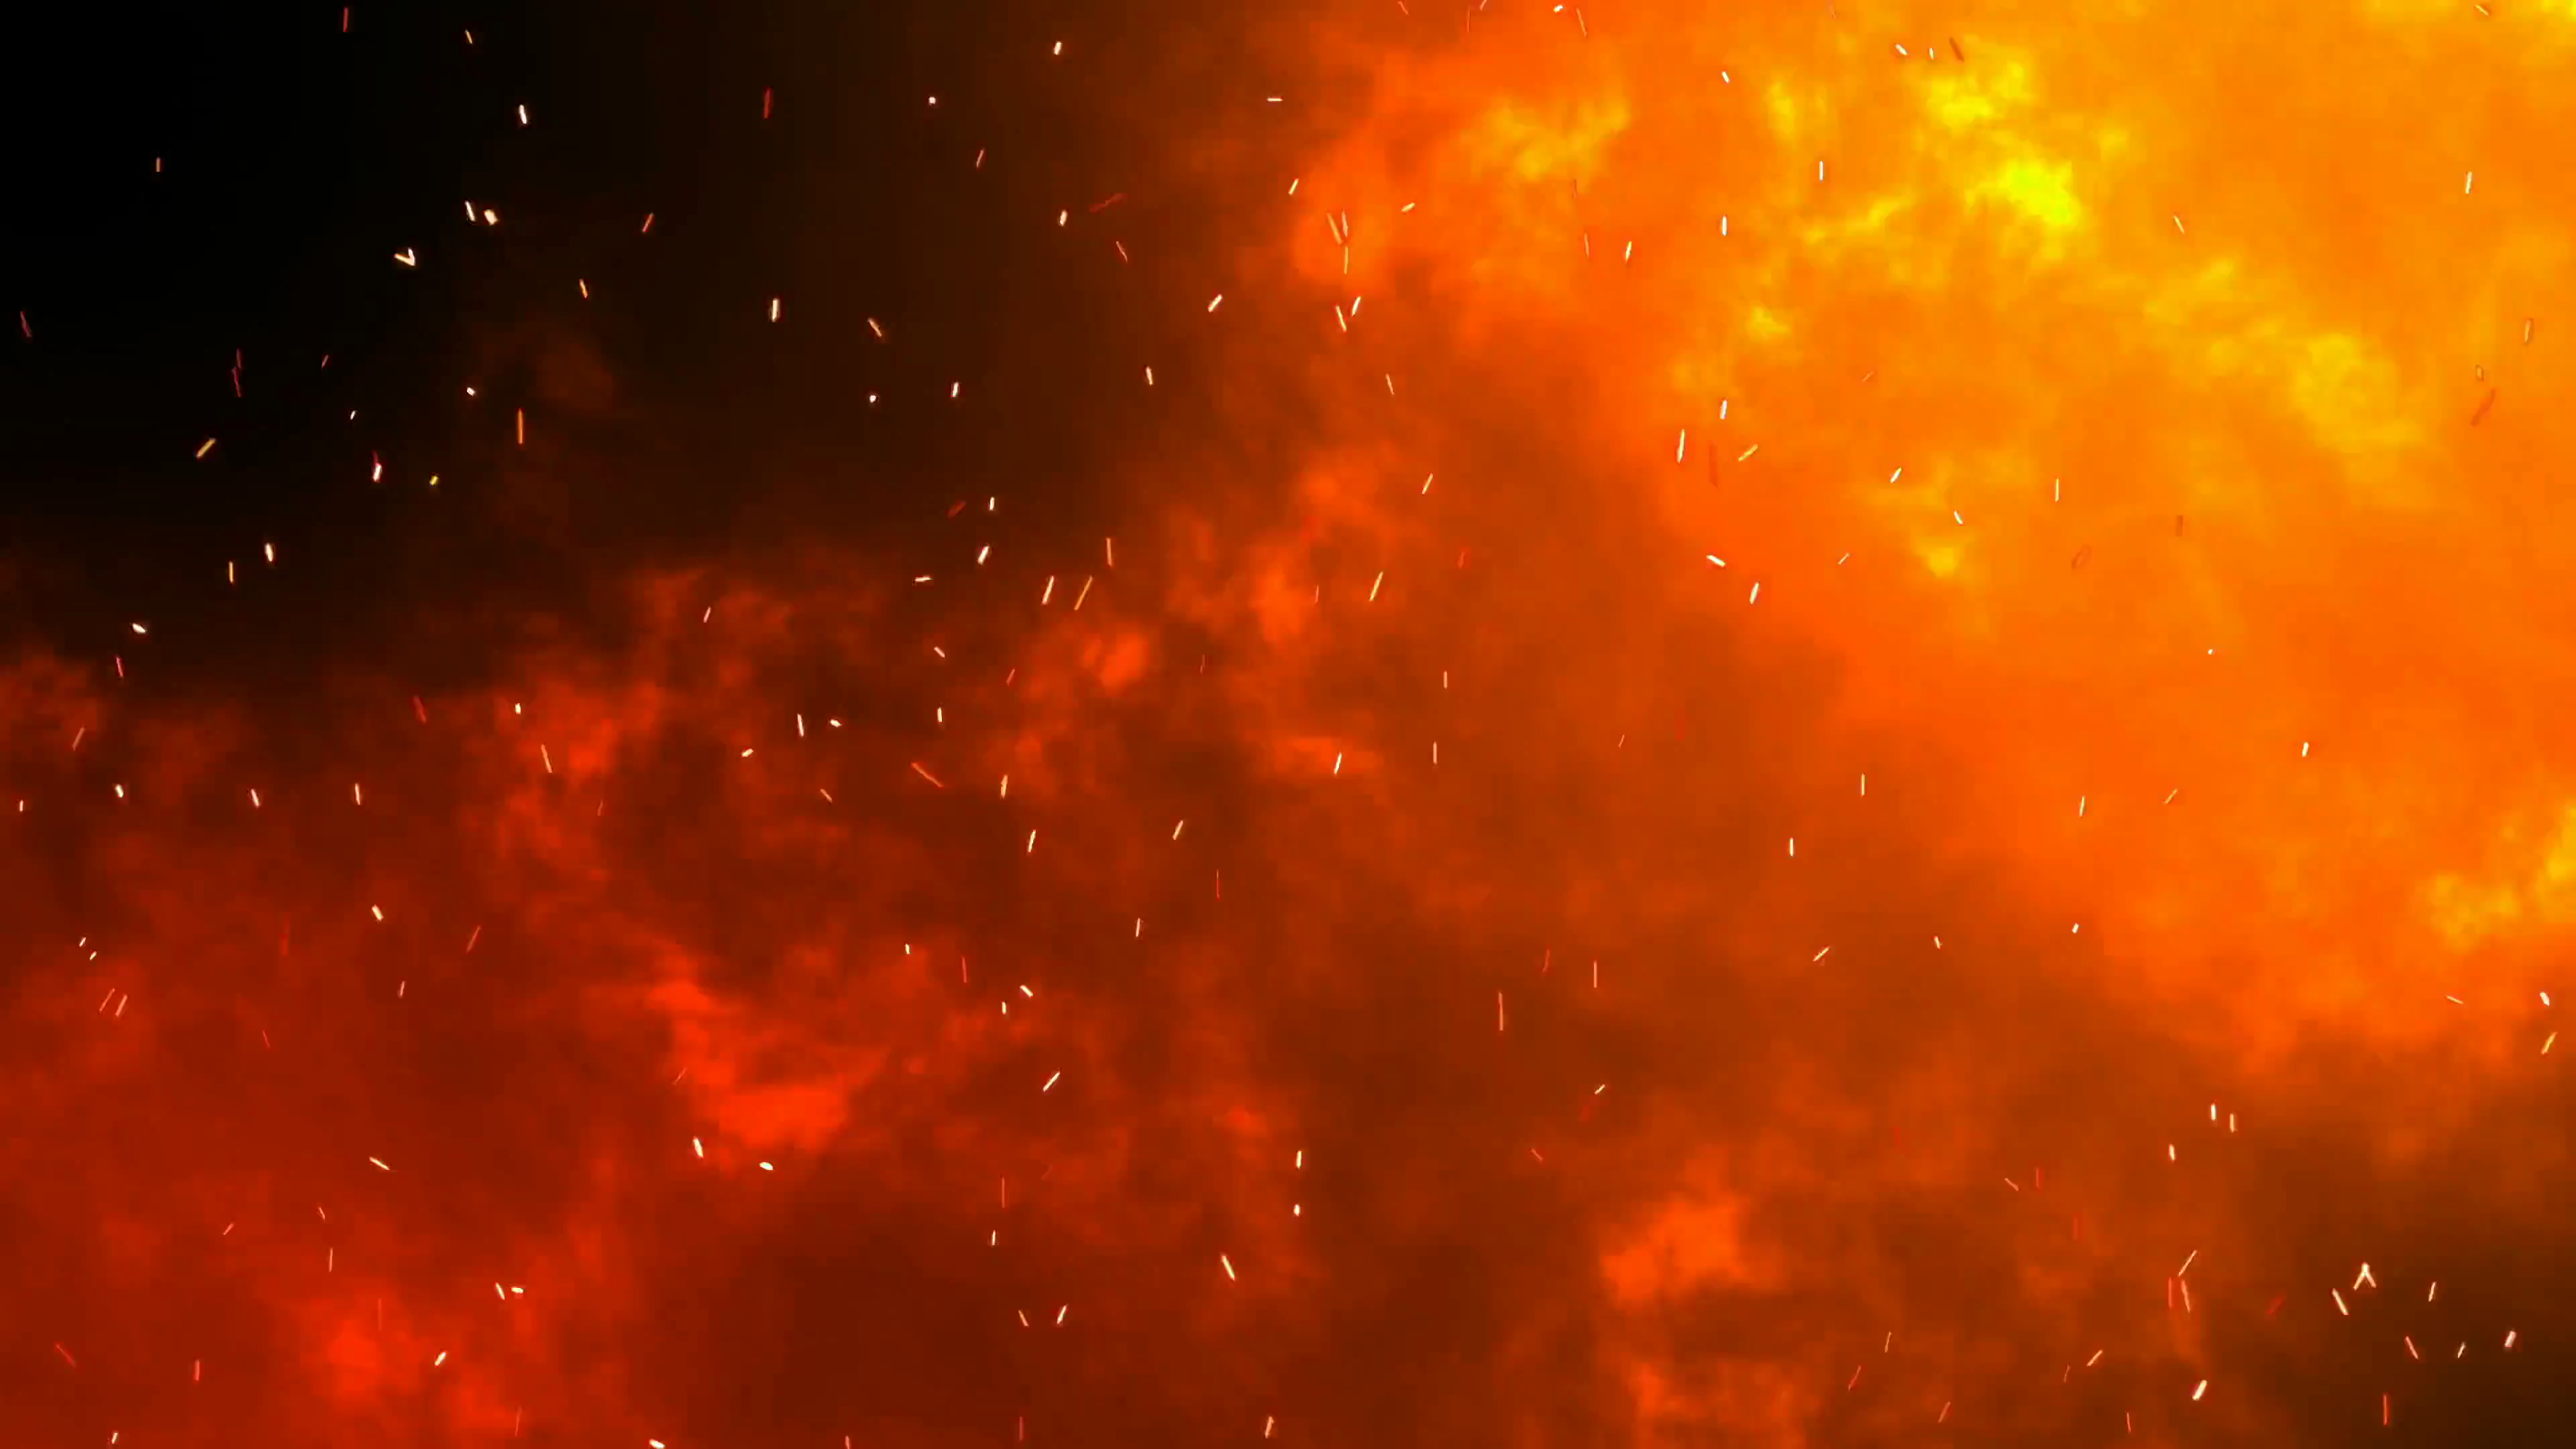

1/1 [==============================] - 0s 54ms/step
Forest fire


In [6]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import librosa
from tensorflow.keras.preprocessing import image
from keras.models import load_model
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('/content/drive/MyDrive/IBM PROJECT/dataset/datasetvideo.mp4')
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    x=image.img_to_array(frame)
    res=cv2.resize(x,dsize=(64,64),interpolation=cv2.INTER_CUBIC)
    #expand the image shape
    x=np.expand_dims(res,axis=0)
    model=load_model("/content/drive/MyDrive/IBM PROJECT/dataset/forest.h5")
    cv2_imshow(frame)
    pred=model.predict(x)
    pred = int(pred[0][0])
    pred
    int(pred)
    if pred==0:
      print('Forest fire')
      break
    else:
      print("no danger")
      break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

#SENDING ALERT MESSAGE

In [8]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 14.3 MB/s 


In [11]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=fed7aa4e3e47d9609777737abddf10bc1506c326b196fbc70bcfe5c64f3714b1
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [13]:
pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from twilio.rest import Client
from playsound import playsound
if pred==0:
  print('Forest fire')
  account_sid='AC34c4bee5e03df7bc7dba1eef29761275'
  auth_token='1fc522239435d0c251c1fd870d715295'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+19803934024',
      #to number
      to='+919962082226')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")

Forest fire
SM67a6986473b564ad32b5b99a9ba280e9
Fire detected
SMS Sent!
